In [1]:
import cairo
from IPython.display import Image, display
import math
from io import BytesIO
import numpy as np
import Shapes
from rgb_colors import colors

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 1000, 1000)
    context = cairo.Context(surface)
    matrix = cairo.Matrix(yy=-1, y0=surface.get_height())
    context.transform(matrix)
    draw_func(context, 1000, 1000)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=1000))

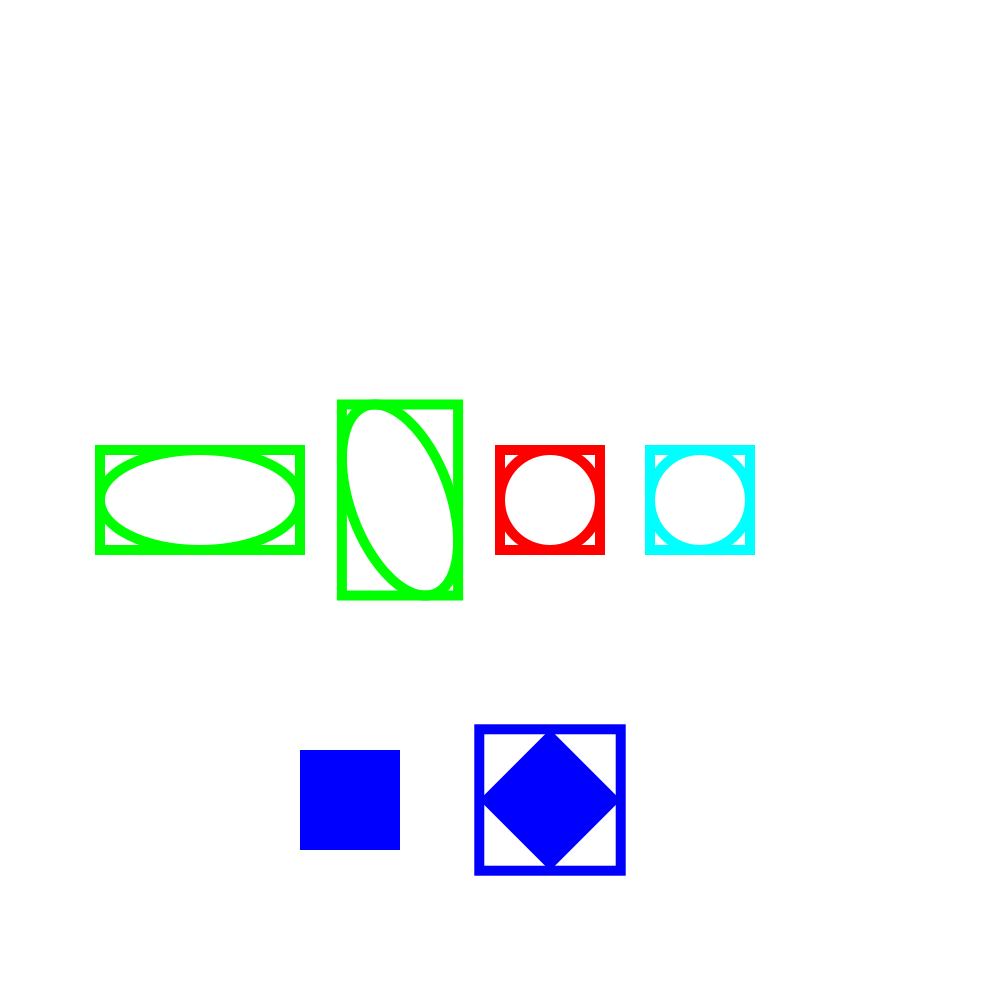

In [31]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="mid_left", ref_pt_x=300, ref_pt_y=200, width=100, height=100
    )
    circ1 = Shapes.My_Circle(
        ref_pt="left", ref_pt_x=500, ref_pt_y=500, radius=50
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=200, ref_pt_y=500, x_radius=100, y_radius=50
    )

    context.set_line_width(10)
    rect1.draw_fill(context, *colors.blue)
    rect1.translate(200, 0)
    rect1.rotate(45)
    rect1.draw_fill(context, *colors.blue)
    rect1.draw_bbox_stroke(context, *colors.blue)

    circ1.draw_bbox_stroke(context, *colors.red)
    circ1.draw_stroke(context, *colors.red)
    circ1.translate(150, 0)
    circ1.rotate(135)
    circ1.draw_stroke(context, *colors.cyan)
    circ1.draw_bbox_stroke(context, *colors.cyan)
    
    ellipse1.draw_stroke(context, *colors.green)
    ellipse1.draw_bbox_stroke(context, *colors.green)
    ellipse1.translate(200, 0)
    ellipse1.rotate(110)
    ellipse1.draw_stroke(context, *colors.green)
    ellipse1.draw_bbox_stroke(context, *colors.green)

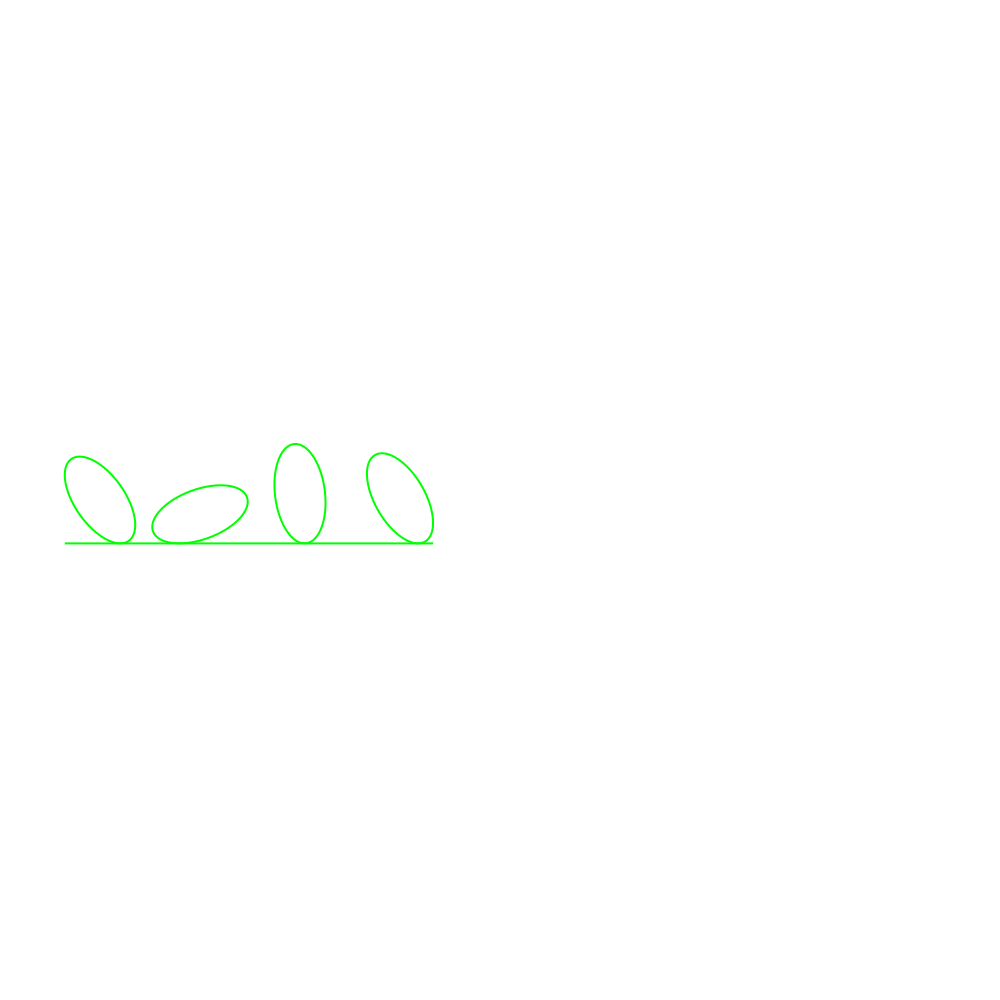

In [32]:
@disp
def draw(context, width, height):
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    ellipse2 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    
    ellipse1.rotate(35)
    ellipse1.draw_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(110)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(77)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(23)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_stroke(context, *colors.green)
    context.move_to(ellipse1.bbox_bot_left_x, ellipse2.bbox_bot_left_y)
    context.line_to(ellipse2.bbox_bot_right_x, ellipse2.bbox_bot_right_y)
    context.stroke()

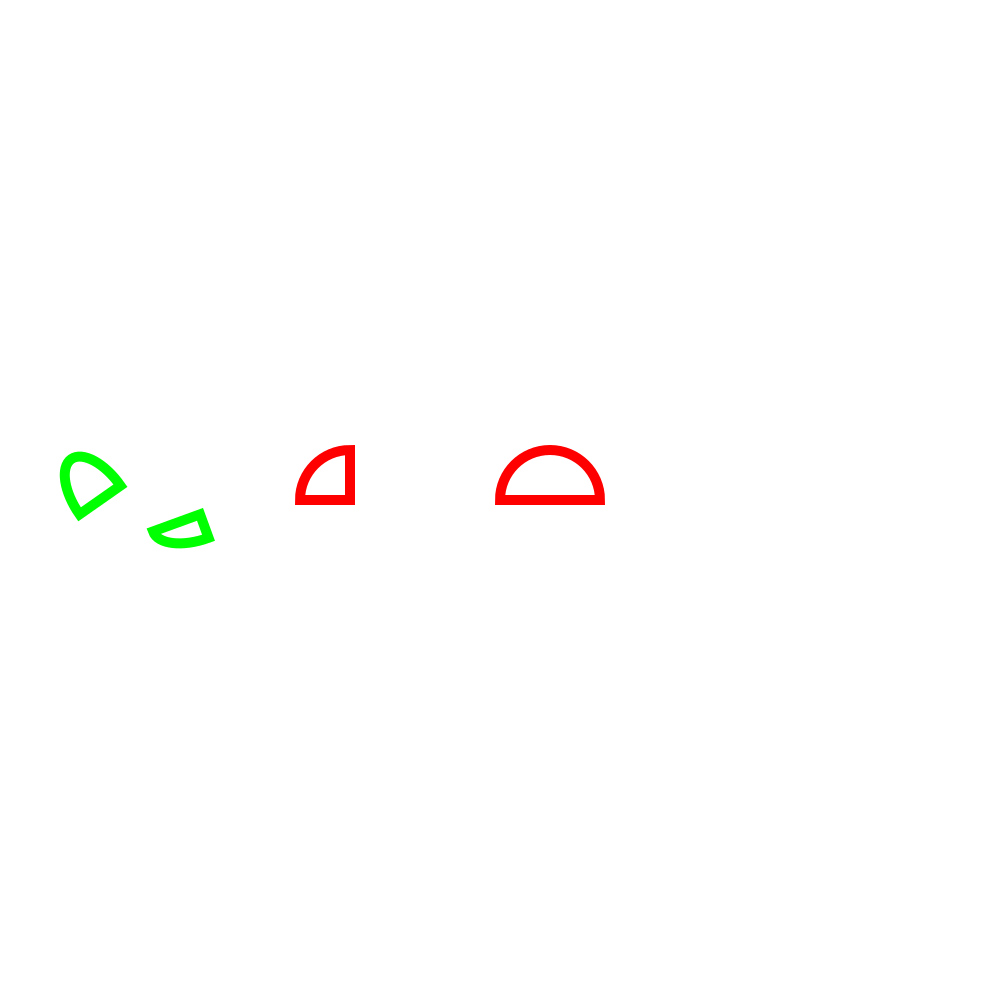

In [33]:
@disp
def draw(context, width, height):
    circ1 = Shapes.My_Circle(
        ref_pt="left", ref_pt_x=500, ref_pt_y=500, radius=50
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    ellipse2 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    
    context.set_line_width(10)
    circ1.draw_half_stroke(context, *colors.red)
    circ1.translate(-200, 0)
    circ1.draw_quarter_stroke(context, *colors.red)
    ellipse1.rotate(35)
    ellipse1.draw_half_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(110)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_quarter_stroke(context, *colors.green)

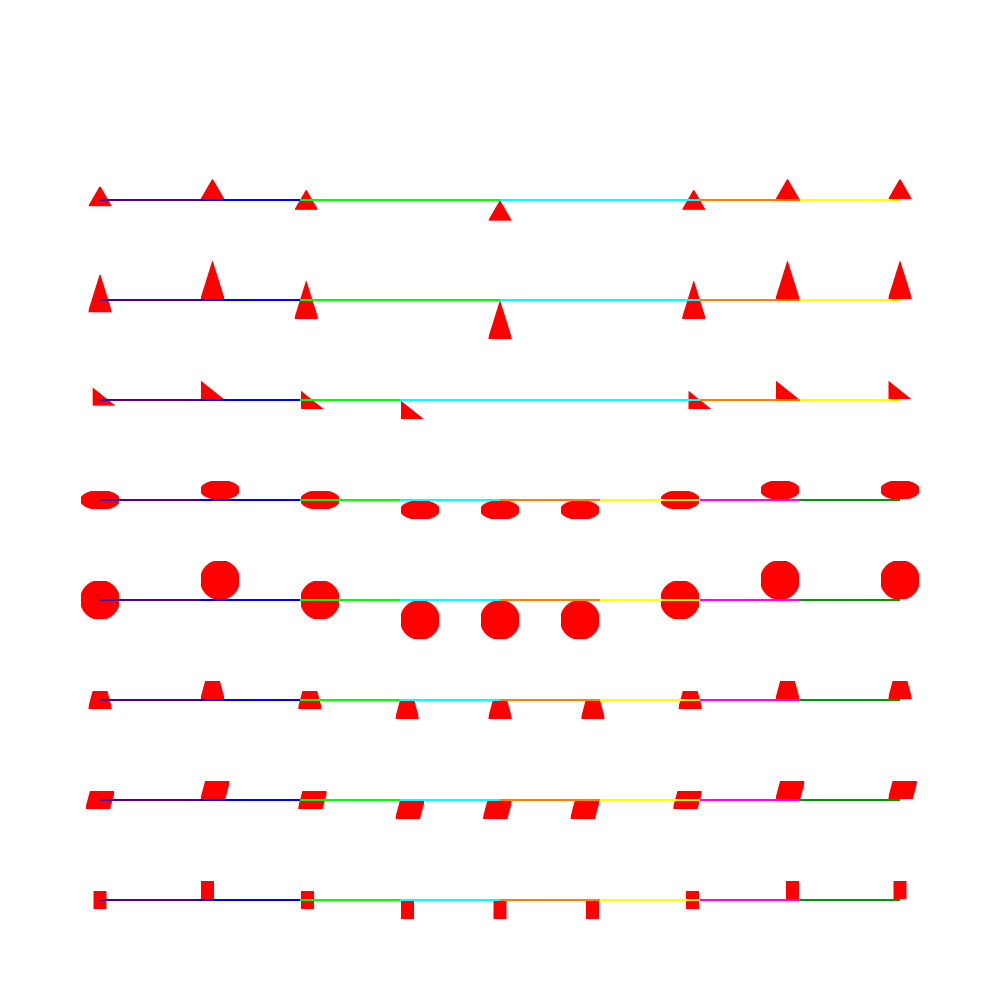

In [34]:
@disp
def draw(context, width, height):
    start_x = 100
    start_y = 100
    positions = {new_list: [] for new_list in ["rect", "par", "trap", "circ", "ellipse", "right_tri", "isos_tri", "equil_tri"]}
    for position in ["center", "bot_left", "mid_left", "top_left", "mid_top", "top_right", "mid_right", "bot_right", "mid_bot"]:
        rect = Shapes.My_Rectangle(
            ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y, width=15, height=20
        )
        rect.draw_fill(context, *colors.red)
        rect.draw_bbox_stroke(context, *colors.white)
        positions["rect"].append([start_x, start_y])
        par = Shapes.My_Parallelogram(
            ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y+100, width=25, angle=15, height=20
        )
        par.draw_fill(context, *colors.red)
        par.draw_bbox_stroke(context, *colors.white)
        positions["par"].append([start_x, start_y+100])
        trap = Shapes.My_Trapezoid(
            ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y+200, bot_width=25, angle=15, height=20
        )
        trap.draw_fill(context, *colors.red)
        trap.draw_bbox_stroke(context, *colors.white)
        positions["trap"].append([start_x, start_y+200])
        circ = Shapes.My_Circle(
            ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y+300, radius=20
        )
        circ.draw_fill(context, *colors.red)
        circ.draw_bbox_stroke(context, *colors.white)
        positions["circ"].append([start_x, start_y+300])
        ellipse = Shapes.My_Ellipse(
            ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y+400, x_radius=20, y_radius=10
        )
        ellipse.draw_fill(context, *colors.red)
        ellipse.draw_bbox_stroke(context, *colors.white)
        positions["ellipse"].append([start_x, start_y+400])
        if (position == "mid_top") | (position == "top_right"):
            pass
        else:
            right_tri = Shapes.My_RightTriangle(
                ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y+500, width=25, height=20
            )
            right_tri.draw_fill(context, *colors.red)
            right_tri.draw_bbox_stroke(context, *colors.white)
            positions["right_tri"].append([start_x, start_y+500])
        if (position == "top_left") | (position == "top_right"):
            pass
        else:
            isos_tri = Shapes.My_IsoscelesTriangle(
                ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y+600, width=25, height=40
            )
            isos_tri.draw_fill(context, *colors.red)
            isos_tri.draw_bbox_stroke(context, *colors.white)
            positions["isos_tri"].append([start_x, start_y+600])
        if (position == "top_left") | (position == "top_right"):
            pass
        else:
            equil_tri = Shapes.My_EquilateralTriangle(
                ref_pt=position, ref_pt_x=start_x, ref_pt_y=start_y+700, width=25
            )
            equil_tri.draw_fill(context, *colors.red)
            equil_tri.draw_bbox_stroke(context, *colors.white)
            positions["equil_tri"].append([start_x, start_y+700])
        start_x += 100

    context.set_line_width(2)
    colors1 = [colors.dark_purple, colors.blue, colors.green, colors.cyan, colors.orange, colors.yellow, colors.pink, colors.dark_green]
    ref_pts = Shapes.My_Line_Coord(positions["rect"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    ref_pts = Shapes.My_Line_Coord(positions["par"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    ref_pts = Shapes.My_Line_Coord(positions["trap"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    ref_pts = Shapes.My_Line_Coord(positions["circ"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    ref_pts = Shapes.My_Line_Coord(positions["ellipse"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    ref_pts = Shapes.My_Line_Coord(positions["right_tri"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    ref_pts = Shapes.My_Line_Coord(positions["isos_tri"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    ref_pts = Shapes.My_Line_Coord(positions["equil_tri"])
    ref_pts.draw_stroke_multicolor(context, *colors1)
    context.stroke()

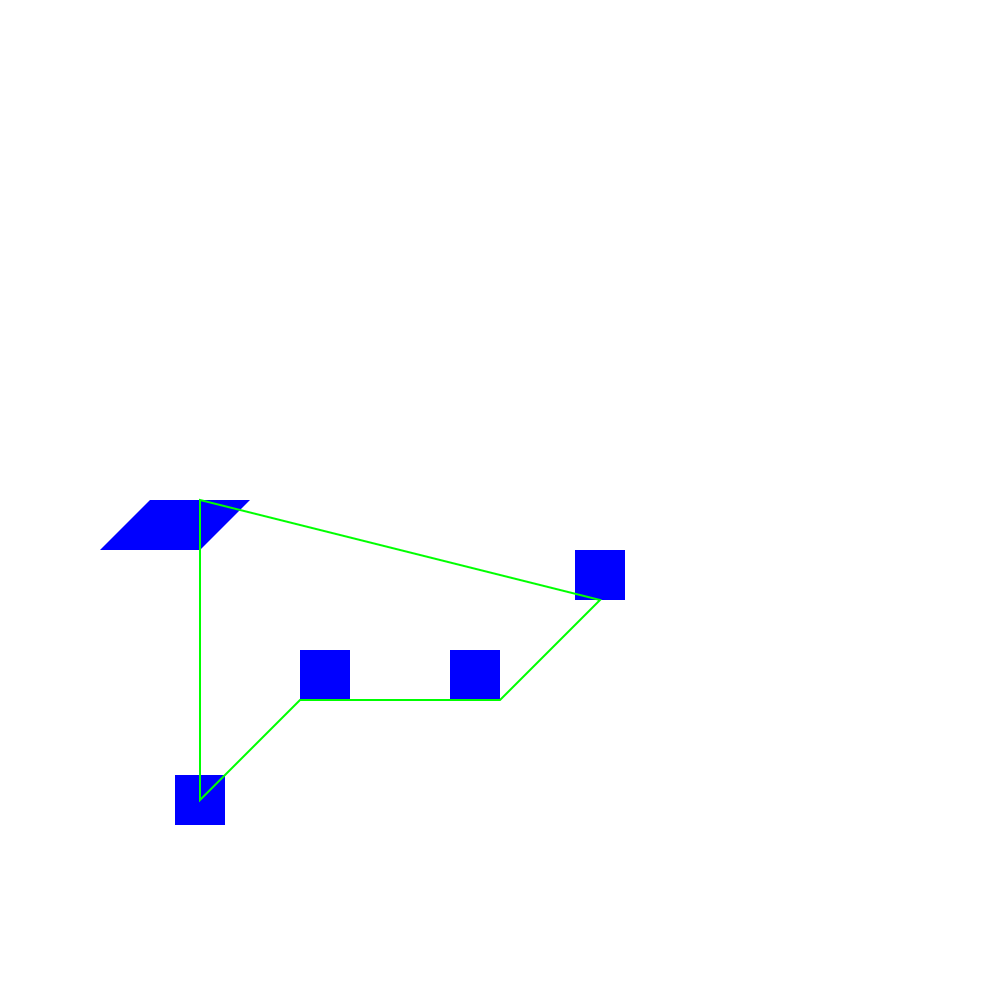

In [35]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=200, ref_pt_y=200, width=50, height=50
    )
    par1 = Shapes.My_Parallelogram(
        ref_pt="mid_top", ref_pt_x=200, ref_pt_y=500, width=100, height=50, angle=45
    )
    par1.draw_fill(context, *colors.blue)
    rect1.draw_fill(context, *colors.blue)
    rect1.move_pt_xy_to(rect1.pts_x["pt1"], rect1.pts_y["pt1"], 300, 300)
    rect1.draw_fill(context, *colors.blue)
    rect1.move_pt_x_to(rect1.pts_x["pt3"], 500)
    rect1.draw_fill(context, *colors.blue)
    rect1.move_pt_xy_to(rect1.mid_pts_x["mid_pt_4_1"], rect1.mid_pts_y["mid_pt_4_1"], 600, 400)
    rect1.draw_fill(context, *colors.blue)
    ref_pts = Shapes.My_Line_Coord([[200, 200], [300, 300], [500, 300], [600, 400], [200, 500]])
    ref_pts.draw_stroke(context, *colors.green)

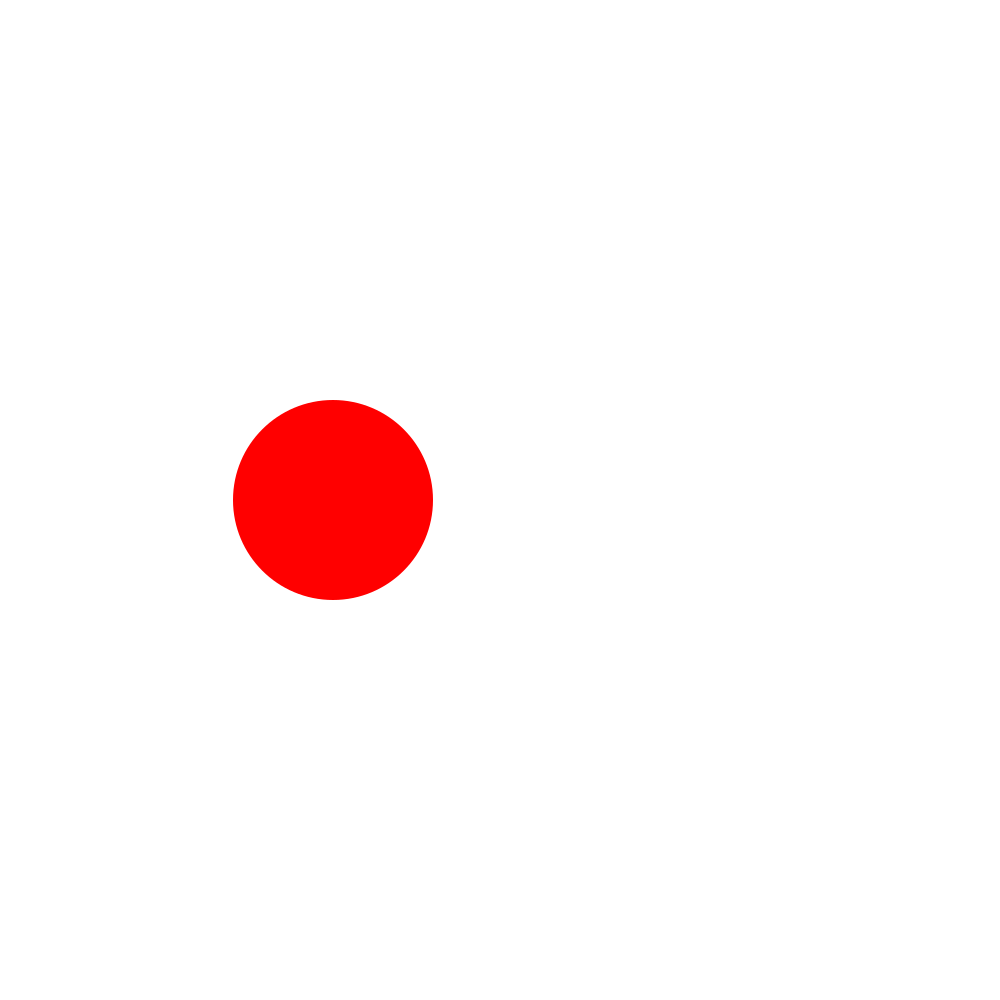

In [36]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=333, ref_pt_y=500, width=200, height=200
    )
    circ1 = Shapes.My_Circle(
        ref_pt="center", ref_pt_x=333, ref_pt_y=500, radius=100
    )

    circ1.clip(context, *colors.blue)
    rect1.draw_fill(context, *colors.red)
    rect1.translate(0, 300)
    rect1.draw_fill(context, *colors.green)
    

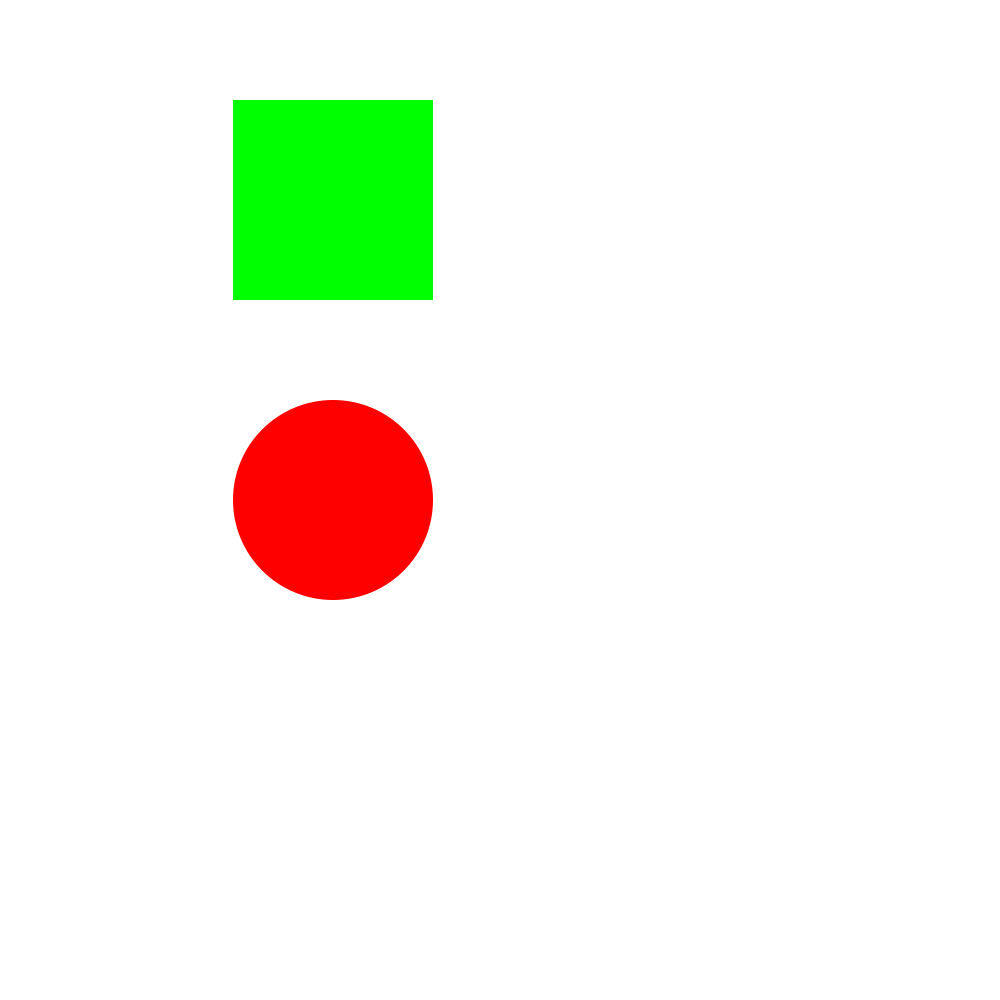

In [37]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=333, ref_pt_y=500, width=200, height=200
    )
    circ1 = Shapes.My_Circle(
        ref_pt="center", ref_pt_x=333, ref_pt_y=500, radius=100
    )

    context.save()
    circ1.clip(context, *colors.blue)
    rect1.draw_fill(context, *colors.red)
    rect1.translate(0, 300)
    context.restore()
    rect1.draw_fill(context, *colors.green)
    

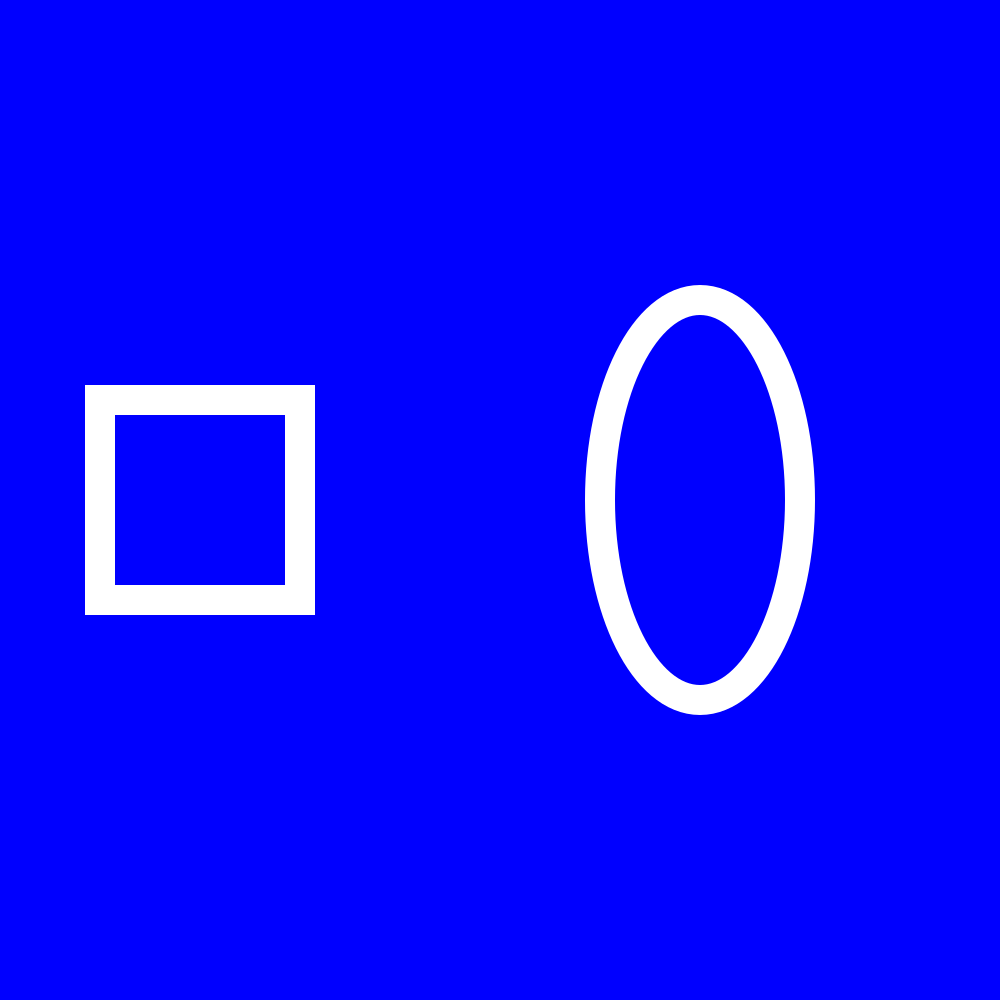

In [7]:
@disp
def draw(context, width, height):
    # 0 is transparent, 1 is opaque
    # For mask, Opaque (1) areas of pattern are painted with the source, transparent (0) areas are not painted
    rect1 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=200, ref_pt_y=500, width=200, height=200
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=700, ref_pt_y=500, x_radius=100, y_radius=200
    )
    
    context.push_group()
    context.set_source_rgba(*colors.blue, 1)
    context.paint()
    context.pop_group_to_source()

    context.push_group()
    context.set_operator(cairo.Operator.SOURCE)
    context.paint_with_alpha(1)
    context.set_line_width(30)
    rect1.draw_stroke(context, *colors.white, 0)
    ellipse1.draw_stroke(context, *colors.white, 0)

    context.mask(context.pop_group())

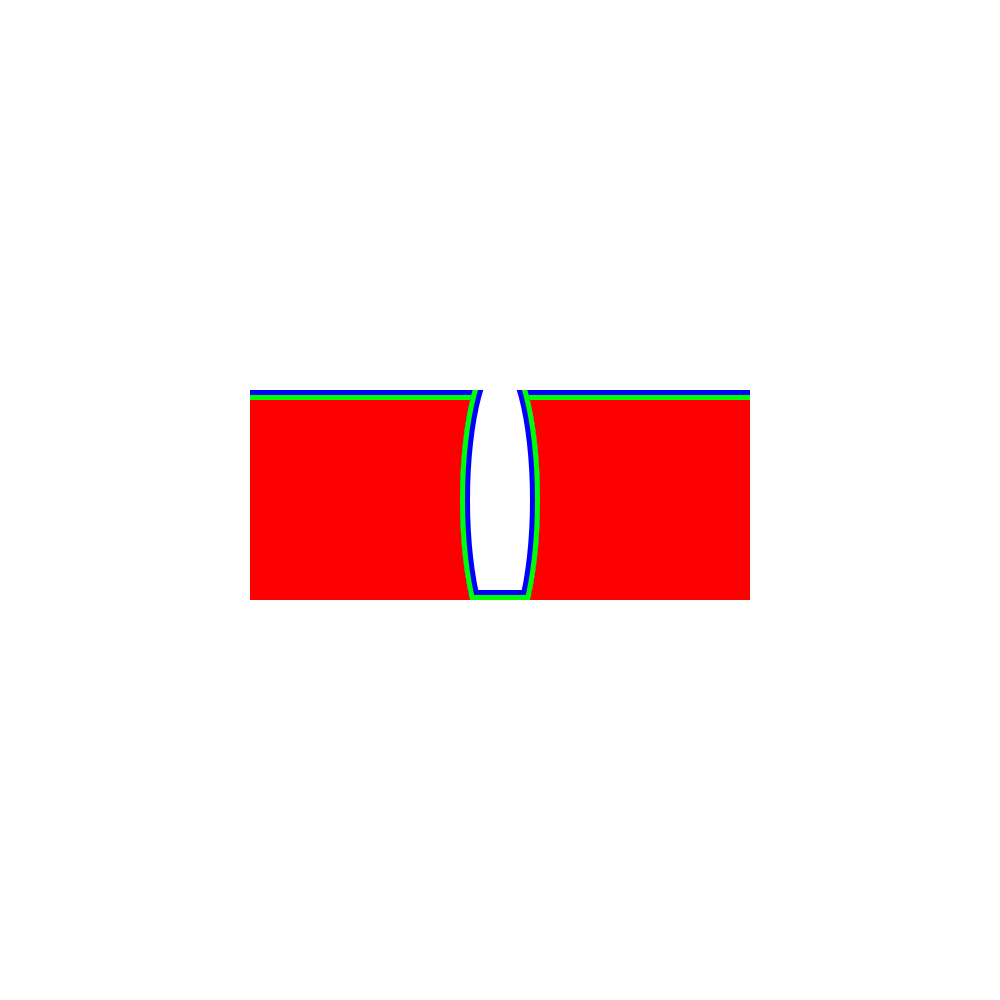

In [60]:
@disp
def draw(context, width, height):
    rect = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, width=500, height=200
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, x_radius=40, y_radius=150
    )
    outline1 = Shapes.My_Line_Coord([[rect.bbox_top_left_x, rect.bbox_top_left_y], [rect.bbox_top_right_x, rect.bbox_top_right_y]])
    outline2 = Shapes.My_Line_Coord([[rect.bbox_bot_left_x, rect.bbox_bot_left_y], [rect.bbox_bot_right_x, rect.bbox_bot_right_y]])
    
    context.set_operator(cairo.Operator.SOURCE)

    context.push_group()
    line_width = 20
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue)
    line_width = 10
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.green)
    rect.draw_fill(context, *colors.red)

    context.save()
    ellipse1.clip(context, *colors.white)
    ellipse1.draw_fill(context, *colors.white)
    line_width = 20
    context.set_line_width(line_width)
    ellipse1.draw_stroke(context, *colors.blue)
    outline2.draw_stroke(context, *colors.blue)
    line_width = 10
    context.set_line_width(line_width)
    ellipse1.draw_stroke(context, *colors.green)
    outline2.draw_stroke(context, *colors.green)
    context.restore()
    context.pop_group_to_source()

    # mask the top and bottom of exclusion
    context.push_group()
    context.paint_with_alpha(0)
    line_width = 20
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue, 1)
    rect.draw_fill(context, *colors.white, 1)
    context.mask(context.pop_group())

    

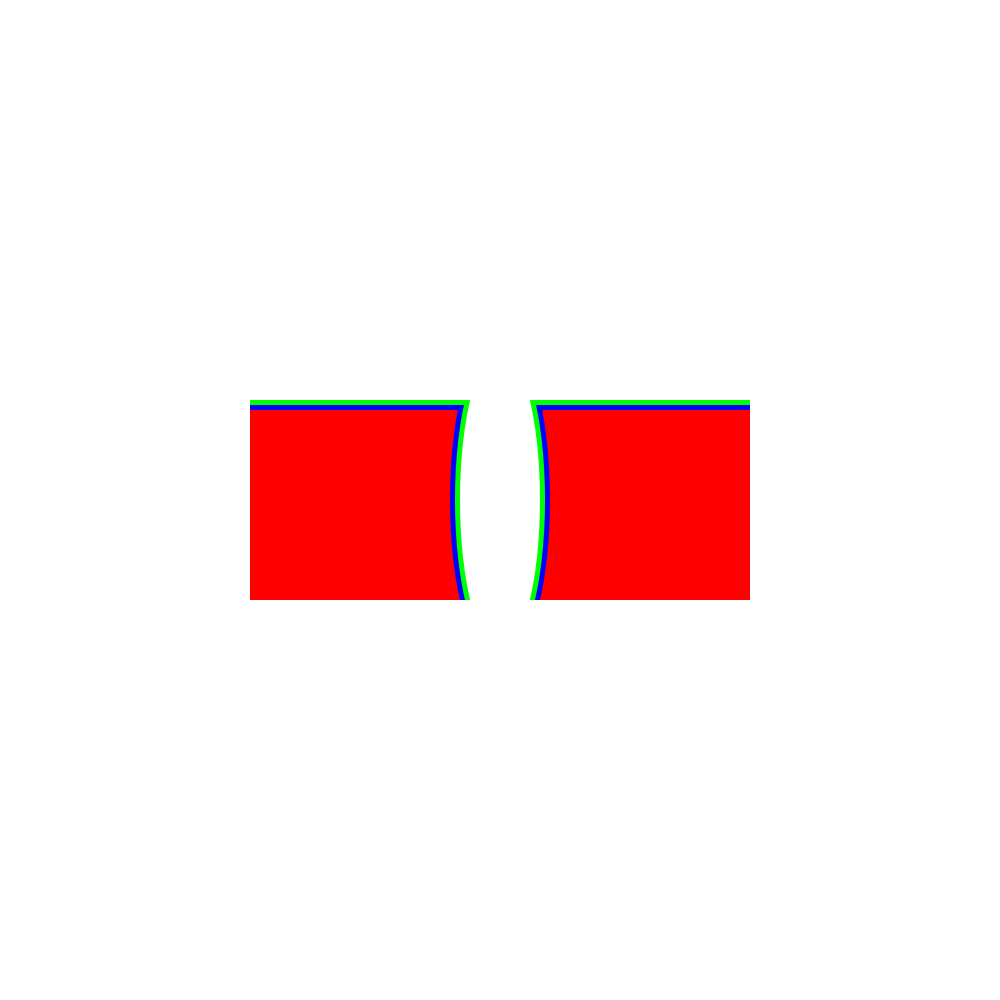

In [28]:
@disp
def draw(context, width, height):
    rect = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, width=500, height=200
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, x_radius=40, y_radius=150
    )
    outline1 = Shapes.My_Line_Coord([[rect.bbox_top_left_x, rect.bbox_top_left_y], [rect.bbox_top_right_x, rect.bbox_top_right_y]])
    outline2 = Shapes.My_Line_Coord([[rect.bbox_bot_left_x, rect.bbox_bot_left_y], [rect.bbox_bot_right_x, rect.bbox_bot_right_y]])
    
    

    # create a pattern for the top lines
    context.set_operator(cairo.Operator.SOURCE)
    context.push_group()
    rect.draw_fill(context, *colors.red)
    line_width = 20
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue)
    ellipse1.draw_stroke(context, *colors.blue)
    line_width = 10
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.green)
    ellipse1.draw_stroke(context, *colors.green)
    ellipse1.draw_fill(context, *colors.white)
    top_lines = context.pop_group_to_source()
    context.push_group()
    rect.draw_fill(context, *colors.red)
    rect_mask = context.pop_group()
    context.mask(rect_mask)

    # context.save()
    # rect.clip(context, *colors.white)
    # ellipse1.draw_fill(context, *colors.white)
    # line_width = 20
    # context.set_line_width(line_width)
    # ellipse1.draw_stroke(context, *colors.blue)
    # outline2.draw_stroke(context, *colors.blue)
    # line_width = 10
    # context.set_line_width(line_width)
    # ellipse1.draw_stroke(context, *colors.green)
    # outline2.draw_stroke(context, *colors.green)
    # context.restore()
    # context.pop_group_to_source()

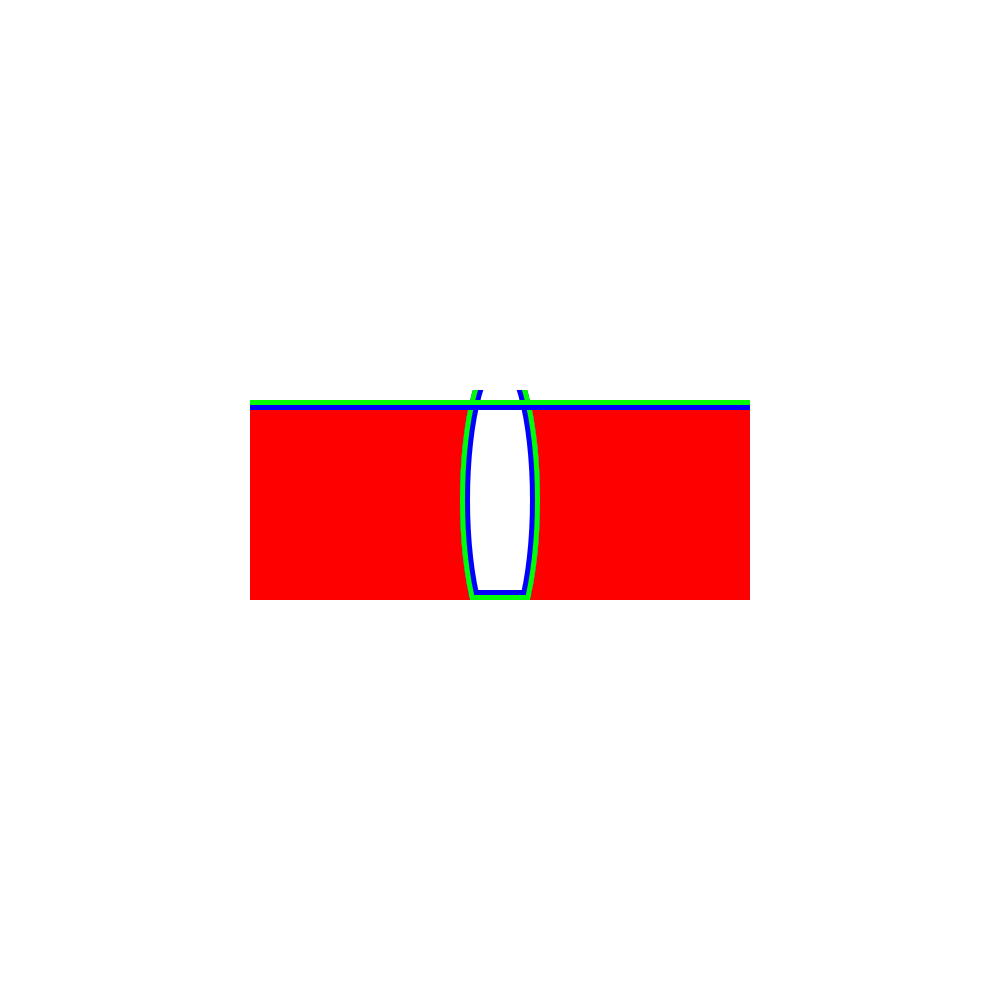

In [2]:
@disp
def draw(context, width, height):
    rect = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, width=500, height=200
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, x_radius=40, y_radius=150
    )
    outline1 = Shapes.My_Line_Coord([[rect.bbox_top_left_x, rect.bbox_top_left_y], [rect.bbox_top_right_x, rect.bbox_top_right_y]])
    outline2 = Shapes.My_Line_Coord([[rect.bbox_bot_left_x, rect.bbox_bot_left_y], [rect.bbox_bot_right_x, rect.bbox_bot_right_y]])
    
    # create a mask for the rectangle and top lines
    context.set_operator(cairo.Operator.SOURCE)
    context.push_group()
    rect.draw_fill(context, *colors.red, 1)
    line_width = 20
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue, 1)
    bound_mask = context.pop_group()

    # create a mask for just the rectangle
    context.set_operator(cairo.Operator.SOURCE)
    context.push_group()
    rect.draw_fill(context, *colors.red, 1)
    rect_mask = context.pop_group()

    # draw the rectangle because it's lowest on drawing layer
    context.set_operator(cairo.Operator.OVER)
    rect.draw_fill(context, *colors.red)

    # create the inner part of the ellipse, mask it with our bounding mask, and draw to surface
    context.push_group()
    context.save()
    ellipse1.clip(context, *colors.white)
    ellipse1.draw_fill(context, *colors.white)
    line_width = 20
    context.set_line_width(line_width)
    ellipse1.draw_stroke(context, *colors.blue)
    outline2.draw_stroke(context, *colors.blue)
    line_width = 10
    context.set_line_width(line_width)
    ellipse1.draw_stroke(context, *colors.green)
    outline2.draw_stroke(context, *colors.green)
    context.restore()
    context.pop_group_to_source()
    context.mask(bound_mask)

    # create a pattern for the top lines
    context.push_group()
    line_width = 20
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue)
    line_width = 10
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.green)
    context.pop_group_to_source()
    context.mask(rect_mask)

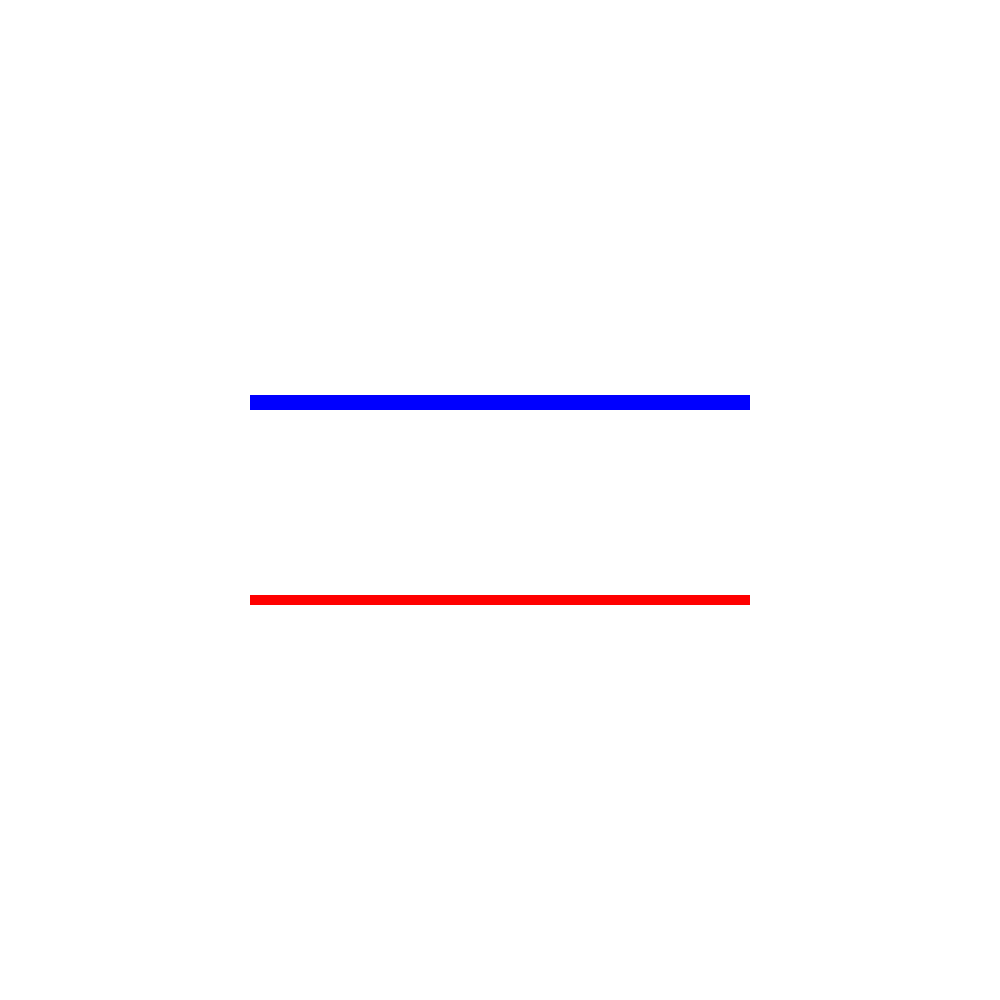

In [21]:
@disp
def draw(context, width, height):
    rect = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, width=500, height=200
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, x_radius=40, y_radius=150
    )
    outline1 = Shapes.My_Line_Coord([[rect.bbox_top_left_x, rect.bbox_top_left_y], [rect.bbox_top_right_x, rect.bbox_top_right_y]])
    outline2 = Shapes.My_Line_Coord([[rect.bbox_bot_left_x, rect.bbox_bot_left_y], [rect.bbox_bot_right_x, rect.bbox_bot_right_y]])
    
    # create a mask for the rectangle and top lines
    # context.set_operator(cairo.Operator.SOURCE)
    # context.push_group()
    # line_width = 20
    # context.set_line_width(line_width)
    # outline1.draw_stroke(context, *colors.blue)
    # bound_mask = context.pop_group()

    # # create a mask for just the rectangle
    # context.set_operator(cairo.Operator.SOURCE)
    # context.push_group()
    # rect.draw_fill(context, *colors.red, 1)
    # rect_mask = context.pop_group()

    # line_width = 20
    # context.set_line_width(line_width)

    # context.save()
    # ellipse1.clip(context, *colors.white)
    # ellipse1.draw_stroke(context, *colors.blue)
    # context.restore()

    # line_width = 10
    # context.set_line_width(line_width)

    # context.save()
    # ellipse1.clip(context, *colors.green)
    # ellipse1.draw_stroke(context, *colors.green)
    # context.restore()

    context.set_operator(cairo.Operator.SOURCE)
    context.push_group()
    line_width = 20
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue)
    context.pop_group_to_source()
    
    context.push_group()
    rect.draw_fill(context, *colors.red, 1)
    line_width = 10
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue, 1)
    context.mask(context.pop_group())

    line_width = 10
    context.set_line_width(line_width)
    outline2.draw_stroke(context, *colors.red)

    # context.push_group()
    # line_width = 10
    # context.set_line_width(line_width)
    # outline1.draw_stroke(context, *colors.green)
    # context.pop_group_to_source()
    
    # context.push_group()
    # rect.draw_fill(context, *colors.red, 1)
    # context.mask(context.pop_group())
    

In [22]:
with cairo.SVGSurface("C:\\Users\\jon21\\Downloads\\test.svg", 700, 700) as surface:
    context = cairo.Context(surface)

    rect = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, width=500, height=200
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, x_radius=40, y_radius=150
    )
    outline1 = Shapes.My_Line_Coord([[rect.bbox_top_left_x, rect.bbox_top_left_y], [rect.bbox_top_right_x, rect.bbox_top_right_y]])
    outline2 = Shapes.My_Line_Coord([[rect.bbox_bot_left_x, rect.bbox_bot_left_y], [rect.bbox_bot_right_x, rect.bbox_bot_right_y]])

    context.set_operator(cairo.Operator.SOURCE)
    context.push_group()
    line_width = 20
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue)
    context.pop_group_to_source()
    
    context.push_group()
    rect.draw_fill(context, *colors.red, 1)
    line_width = 10
    context.set_line_width(line_width)
    outline1.draw_stroke(context, *colors.blue, 1)
    context.mask(context.pop_group())

    line_width = 10
    context.set_line_width(line_width)
    outline2.draw_stroke(context, *colors.red)